In [11]:
from fastai.vision import *
from pathlib import Path
from fastai.callbacks import *
import os
import matplotlib.pyplot as plt
from fastai.vision import Path

In [12]:
my_stats = ([0.4712, 0.2012, 0.3929], [0.3411, 0.2432, 0.2331])

In [13]:
class Agent:
    def setPathSave(self, path):
        self.pathSave = path
    
    def load(self, modelName):
        self.net.load(pathSave/modelName)
        
    def readData(self, path):
        self.data = (ImageList.from_folder(path) #Donde encontrar la data? -> en "path" y sus carpetas
                    .split_by_rand_pct(0.3, seed=1794)  #Como dividir ?
                    .label_from_folder()            #Como etiquetar? -> Dependiendo de los nombres de las carpetas
                    .transform(None , size = 256)     #Data augmentation? -> Usar tfms con un tamaño de imagen 256
                    .databunch(bs = 32)
                    .normalize(my_stats))
                     
    def showData(self):
        self.data.show_batch(3, figsize=(6,6), hide_axis=False)
    
    def createNeuralNetwork(self):
        self.net = cnn_learner(self.data, models.alexnet, pretrained= False, metrics=[accuracy])
    
    def showLearningRateGraphic(self):
        self.net.lr_find()
        self.net.recorder.plot()
    
    def train(self, epochs, minLearningRate, maxLearningRate):
         self.net.fit_one_cycle(epochs, max_lr=slice(minLearningRate, maxLearningRate), 
                               callbacks=[SaveModelCallback(self.net, every='improvement', monitor = 'accuracy', name= self.pathSave/'model')])
    
    def showConfusionMatrix(self):
        interp = ClassificationInterpretation.from_learner(self.net)
        interp.plot_confusion_matrix()
    
    def saveModel(self, filename):
        self.net.load(self.pathSave/filename)
        self.net.export(self.pathSave/Path(filename + '.pkl'))

In [14]:
agent = Agent()
pathData = Path('/home/graphter/Speech Emotion Recognition/Dataset_propio/Spectrograms2')
pathSave = Path('/home/graphter/Speech Emotion Recognition/Dataset_propio/models2')

In [15]:
agent.setPathSave(pathSave)

In [16]:
agent.readData(pathData)

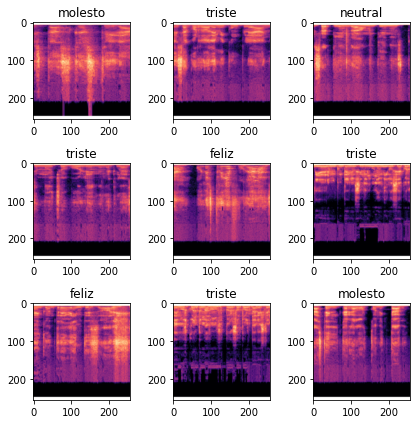

In [17]:
agent.showData()

In [18]:
agent.data.classes

['feliz', 'molesto', 'neutral', 'triste']

In [19]:
vc = pd.value_counts(agent.data.train_ds.y.items, sort=False)
vc.index = agent.data.classes
vc

feliz      72
molesto    70
neutral    67
triste     71
dtype: int64

In [20]:
vcValid = pd.value_counts(agent.data.valid_ds.y.items, sort=False)
vcValid.index = agent.data.classes
vcValid

feliz      28
molesto    30
neutral    33
triste     29
dtype: int64

In [21]:
agent.data.stats

([0.4712, 0.2012, 0.3929], [0.3411, 0.2432, 0.2331])

In [22]:
agent.createNeuralNetwork()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


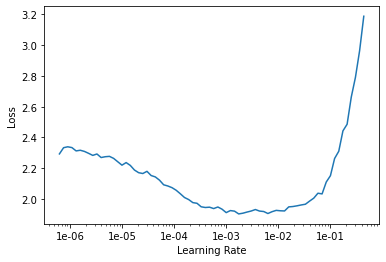

In [23]:
agent.showLearningRateGraphic()

In [24]:
agent.net.unfreeze()
agent.train(15, 5e-3, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.549490,58.102898,0.241667,00:02
1,2.614130,283.620789,0.250000,00:02
2,2.695898,373.026306,0.250000,00:02
3,3.021865,90.680817,0.250000,00:02
4,3.393350,73.411507,0.266667,00:02
5,3.640995,22.917150,0.275000,00:02
6,3.545306,13.124034,0.325000,00:02
7,3.326008,3.010931,0.341667,00:02
8,3.105859,1.513623,0.383333,00:02
9,2.870225,1.643109,0.383333,00:02


Better model found at epoch 0 with accuracy value: 0.24166665971279144.
Better model found at epoch 1 with accuracy value: 0.25.
Better model found at epoch 4 with accuracy value: 0.2666666805744171.
Better model found at epoch 5 with accuracy value: 0.2750000059604645.
Better model found at epoch 6 with accuracy value: 0.32499998807907104.
Better model found at epoch 7 with accuracy value: 0.34166666865348816.
Better model found at epoch 8 with accuracy value: 0.38333332538604736.
Better model found at epoch 13 with accuracy value: 0.4416666626930237.
Better model found at epoch 14 with accuracy value: 0.46666666865348816.


In [25]:
agent.load('model-Alexnet-46.6%')

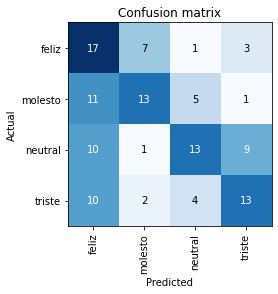

In [26]:
agent.showConfusionMatrix()

In [27]:
agent.net.validate(agent.net.data.train_dl)

[1.078191, tensor(0.4844)]

In [28]:
agent.net.validate(agent.net.data.valid_dl)

[1.3026812, tensor(0.4667)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


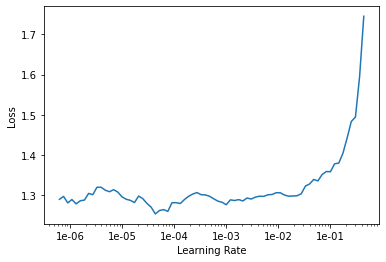

In [29]:
agent.net.unfreeze()
agent.showLearningRateGraphic()

In [30]:
agent.net.unfreeze()
agent.train(25, 1e-3, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.312392,1.542129,0.383333,00:02
1,1.306941,1.231548,0.416667,00:02
2,1.285004,1.653950,0.275000,00:02
3,1.290059,1.669822,0.375000,00:02
4,1.264610,2.211038,0.283333,00:02
5,1.274562,653.975220,0.275000,00:02
6,1.389277,438.105011,0.208333,00:02
7,1.425461,50.591595,0.241667,00:02
8,1.499427,23.236572,0.166667,00:02
9,1.480750,3.067070,0.408333,00:02


Better model found at epoch 0 with accuracy value: 0.38333332538604736.
Better model found at epoch 1 with accuracy value: 0.4166666567325592.
Better model found at epoch 22 with accuracy value: 0.4749999940395355.
Better model found at epoch 23 with accuracy value: 0.49166667461395264.
Better model found at epoch 24 with accuracy value: 0.5166666507720947.


In [37]:
agent.load('model-Alexnet-51.6%')

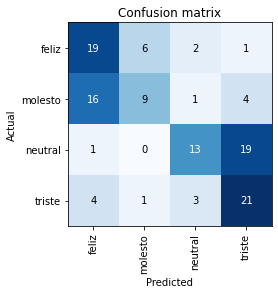

In [38]:
agent.showConfusionMatrix()

In [39]:
agent.net.validate(agent.net.data.train_dl)

[0.7799468, tensor(0.6445)]

In [40]:
agent.net.validate(agent.net.data.valid_dl)

[0.97154576, tensor(0.5167)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


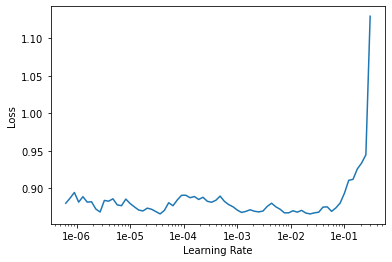

In [35]:
agent.net.freeze()
agent.showLearningRateGraphic()

In [41]:
agent.net.freeze()
agent.train(15, 1e-4, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.907425,0.977026,0.533333,00:02
1,0.891026,0.988999,0.558333,00:02
2,0.900103,1.003759,0.575000,00:02
3,0.886023,1.013680,0.541667,00:02
4,0.895039,1.030752,0.516667,00:02
5,0.879658,1.001081,0.566667,00:02
6,0.880848,1.055094,0.491667,00:02
7,0.878939,0.994769,0.550000,00:02
8,0.870061,1.018906,0.525000,00:02
9,0.862968,1.057712,0.491667,00:02


Better model found at epoch 0 with accuracy value: 0.5333333611488342.
Better model found at epoch 1 with accuracy value: 0.5583333373069763.
Better model found at epoch 2 with accuracy value: 0.574999988079071.


In [42]:
agent.load('model-Alexnet-57.5%')

In [ ]:
agent.showConfusionMatrix()